## Error plot with respect to $\beta$

In [1]:
using TracyWidomBeta,LinearAlgebra,Statistics,SparseArrays,Distributions,Trapz,ApproxFun,SpecialFunctions
using RandomMatrices,Plots,LaTeXStrings,TypedTables,StatsBase,FFTW

To compute the errors, we treat the following as the ground truths.

In [2]:
TW2=TracyWidom;
F1=Fun(x->cdf(TW2,x; beta=1,num_points=300),-10..13);
F2=Fun(x->cdf(TW2,x; beta=2,num_points=300),-10..13);
F4=Fun(x->cdf(TW2,x; beta=4,num_points=300),-10..13);
f1=F1';
f2=F2';
f4=F4';

The following plot shows how the absolute error (CDF) over the entire domain $x\in[-10,13]$ changes with respect to $\beta=1,2,4$. $\Delta x=-0.01$ and $M=1000$ are used.

In [3]:
function err_cdf(D)
    er_cdf=Plots.plot();
    beta=[1,2,4];
    err1=zeros(length(D),1);
    err2=zeros(length(D),1);
    err4=zeros(length(D),1);
    for j=1:length(beta)
        global β=beta[j]
        F_cdf=TW(β)
        for i=1:length(D)
            temp=D[i]
            if β==4
                err4[i]=abs(F_cdf(temp/(2^(1/6)))-cdf(TW2,temp;beta=4,num_points=300))
            elseif β==1
                err1[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=1,num_points=300))
            elseif β==2
                err2[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=2,num_points=300))
            end
        end
        for i=1:length(D)
            if err1[i]<10^(-16)
                err1[i]=10^(-16)
            end
            if err2[i]<10^(-16)
                err2[i]=10^(-16)
            end
            if err4[i]<10^(-16)
                err4[i]=10^(-16)
            end
        end
        if β==1
            er_cdf=Plots.plot!(D,err1,lw=5,label=L"$\beta=1$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6)],
                xticks=D[end]:2:D[1])
        elseif β==2
            er_cdf=Plots.plot!(D,err2,lw=5,label=L"$\beta=2$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6)],
                xticks=D[end]:2:D[1])
        elseif β==4
            er_cdf=Plots.plot!(D,err4,lw=5,label=L"$\beta=4$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6)],
                xticks=D[end]:2:D[1])
        end
    end
    return er_cdf
end

err_cdf (generic function with 1 method)

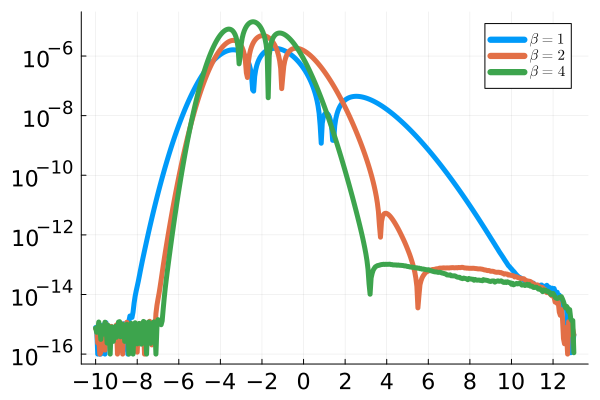

In [4]:
D=13:-0.05:-10;
er_cdf=err_cdf(D)

The following table shows the absolute errors for $x=0,\pm 2,\pm 4,\pm 6, \pm 8$, $\beta=1,2,4$.

In [5]:
X=-8:2:8;
err=zeros(length(X),3);
B=[1,2,4];
for i=1:length(B)
    global β=B[i]
    F_cdf=TW(β)
    for j=1:length(X)
        temp=X[j]
        if β==4
            err[j,3]=abs(F_cdf(temp/(2^(1/6)))-cdf(TW2,temp;beta=4,num_points=300))
        elseif β==1
            err[j,1]=abs(F_cdf(temp)-cdf(TW2,temp;beta=1,num_points=300))
        elseif β==2
            err[j,2]=abs(F_cdf(temp)-cdf(TW2,temp;beta=2,num_points=300))
        end
    end
end
err1=err[:,1];err2=err[:,2];err4=err[:,3];

In [6]:
Table(x=X,β1=err1,β2=err2,β4=err4)

Table with 4 columns and 9 rows:
     x   β1           β2           β4
   ┌──────────────────────────────────────────
 1 │ -8  1.87679e-14  1.16052e-16  2.19918e-16
 2 │ -6  4.81348e-9   8.73504e-11  3.08449e-11
 3 │ -4  1.12462e-6   1.65889e-6   5.09349e-6
 4 │ -2  1.11001e-6   4.84486e-6   7.58137e-6
 5 │ 0   3.88226e-7   1.53443e-6   8.08261e-7
 6 │ 2   3.3534e-8    1.92712e-8   1.40741e-10
 7 │ 4   1.632e-8     5.22582e-12  1.02363e-13
 8 │ 6   7.13928e-10  6.16174e-14  6.79456e-14
 9 │ 8   9.53571e-12  7.57172e-14  3.33067e-14

Similarly, the following plot is for the PDF.

In [7]:
function err_pdf(D)
    er_pdf=Plots.plot();
    beta=[1,2,4];
    err1=zeros(length(D),1);
    err2=zeros(length(D),1);
    err4=zeros(length(D),1);
    for j=1:length(beta)
        global β=beta[j]
        F_pdf=TW(β;pdf=true)
        for i=1:length(D)
            temp=D[i]
            if β==4
                err4[i]=abs(F_pdf(temp/(2^(1/6)))*(2^(-1/6))-f4(temp))
            elseif β==1
                err1[i]=abs(F_pdf(temp)-f1(temp))
            elseif β==2
                err2[i]=abs(F_pdf(temp)-f2(temp))
            end
        end
        for i=1:length(D)
            if err1[i]<10^(-16)
                err1[i]=10^(-16)
            end
            if err2[i]<10^(-16)
                err2[i]=10^(-16)
            end
            if err4[i]<10^(-16)
                err4[i]=10^(-16)
            end
        end
        if β==1
            er_pdf=Plots.plot!(D,err1,lw=5,label=L"$\beta=1$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-5)],
                xticks=D[end]:2:D[1])
        elseif β==2
            er_pdf=Plots.plot!(D,err2,lw=5,label=L"$\beta=2$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-5)],
                xticks=D[end]:2:D[1])
        elseif β==4
            er_pdf=Plots.plot!(D,err4,lw=5,label=L"$\beta=4$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-5)],
                xticks=D[end]:2:D[1])
        end
    end
    return er_pdf
end

err_pdf (generic function with 1 method)

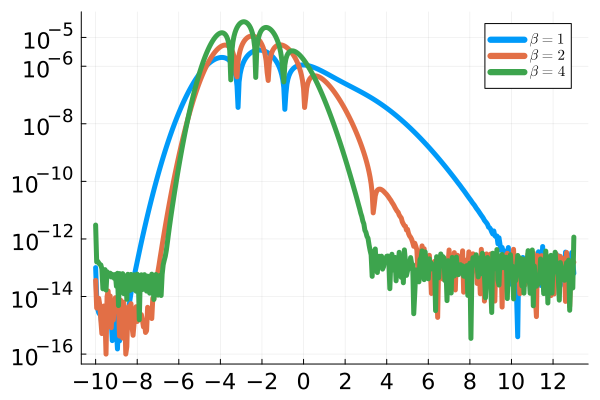

In [8]:
D=13:-0.05:-10;
er_pdf=err_pdf(D)

## Error plot with respect to $\left|\Delta x\right|$ and $M$

The following plots show how the absolute error (CDF) over the entire domain $x\in[-10,13]$ changes when $\left|\Delta x\right|$ decreases and $M$ increases for a fixed $\beta$-value. $\Delta x=-0.02,-0.005,-0.00125$ and $M=\lfloor -10/\Delta x\rfloor$ are used.

In [9]:
function err_cdfc(β,D)
    er_cdfc=Plots.plot();
    delta_x=[-0.02,-0.005,-0.00125];
    for j=1:length(delta_x)
        err=zeros(length(D),1)
        dx=delta_x[j];
        F_cdf=TW(β;Δx_f=dx)
        for i=1:length(D)
            temp=D[i]
            if β==4
                err[i]=abs(F_cdf(temp/(2^(1/6)))-cdf(TW2,temp;beta=4,num_points=300))
            elseif β==1
                err[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=1,num_points=300))
            elseif β==2
                err[i]=abs(F_cdf(temp)-cdf(TW2,temp;beta=2,num_points=300))
            end
        end
        for i=1:length(D)
            if err[i]<10^(-16)
                err[i]=10^(-16)
            end
        end
        if j==1
            er_cdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.02$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        elseif j==2
            er_cdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.005$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        elseif j==3
            er_cdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.00125$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        end
    end
    return er_cdfc
end

err_cdfc (generic function with 1 method)

For $\beta=1$, we have

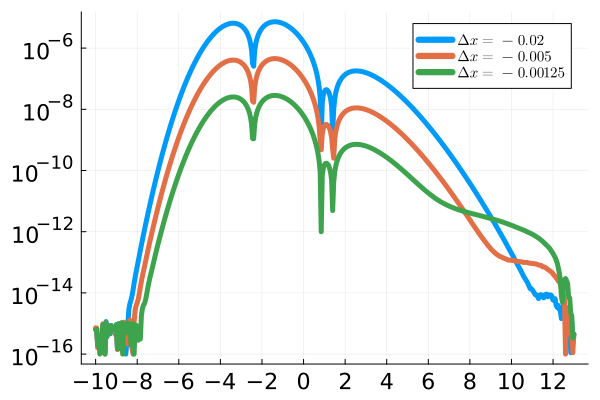

In [10]:
D=13:-0.05:-10;
er_cdfc=err_cdfc(1,D)

For $\beta=2$, we have

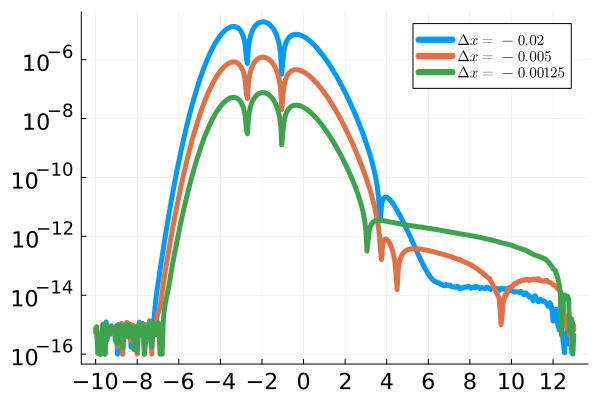

In [11]:
D=13:-0.05:-10;
er_cdfc=err_cdfc(2,D)

For $\beta=4$, we have

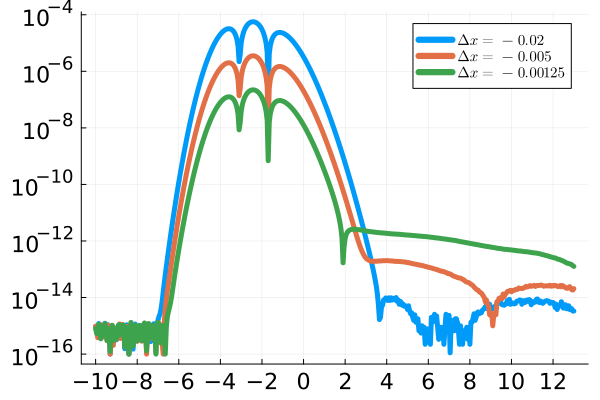

In [12]:
D=13:-0.05:-10;
er_cdfc=err_cdfc(4,D)

Similarly, the following plots are for the PDF.

In [13]:
function err_pdfc(β,D)
    er_pdfc=Plots.plot();
    delta_x=[-0.02,-0.005,-0.00125];
    for j=1:length(delta_x)
        err=zeros(length(D),1)
        dx=delta_x[j];
        F_pdf=TW(β;pdf=true,Δx_f=dx)
        for i=1:length(D)
            temp=D[i]
            if β==4
                err[i]=abs(F_pdf(temp/(2^(1/6)))*(2^(-1/6))-f4(temp))
            elseif β==1
                err[i]=abs(F_pdf(temp)-f1(temp))
            elseif β==2
                err[i]=abs(F_pdf(temp)-f2(temp))
            end
        end
        for i=1:length(D)
            if err[i]<10^(-16)
                err[i]=10^(-16)
            end
        end
        if j==1
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.02$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        elseif j==2
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.01$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        elseif j==3
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.005$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        elseif j==4
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.0025$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        elseif j==5
            er_pdfc=Plots.plot!(D,err,lw=5,label=L"$\Delta x=-0.00125$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=10,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-3),10^(-2)],xticks=D[end]:2:D[1])
        end
    end
    return er_pdfc
end

err_pdfc (generic function with 1 method)

For $\beta=1$, we have

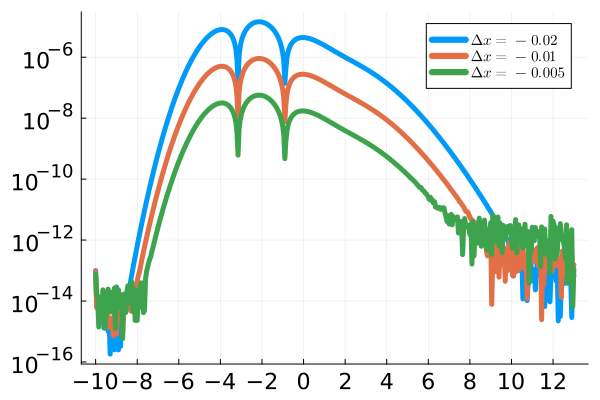

In [14]:
D=13:-0.05:-10;
er_pdfc=err_pdfc(1,D)

For $\beta=2$, we have

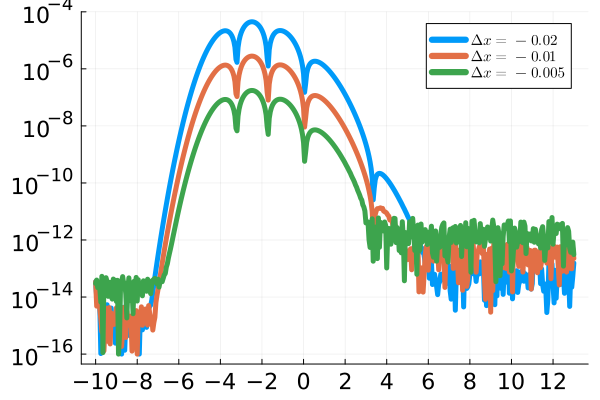

In [15]:
D=13:-0.05:-10;
er_pdfc=err_pdfc(2,D)

For $\beta=4$, we have

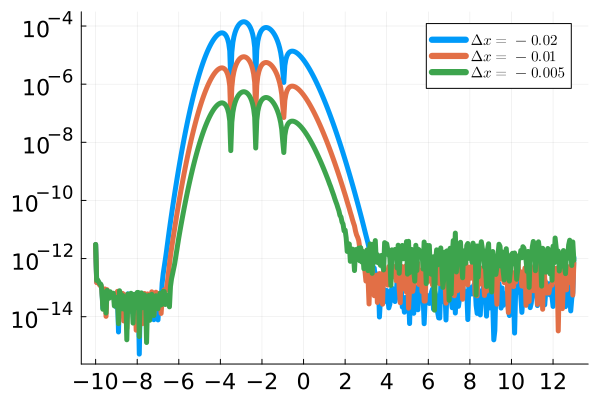

In [16]:
D=13:-0.05:-10;
er_pdfc=err_pdfc(4,D)

## Order of error plot

The following plot shows the order of error of the finite-difference discretization (CDF) using trapezoidal method for $\beta=2$ at $x=-2$ before interpolation with $M=100$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.02,-0.01,-0.004,-0.002$ are used.

In [38]:
β=2;
xx=-2;
p=Plots.plot();
result_ref=TW(β;interp=false,Δx_f=-0.001,M_f=100);
x_ref=result_ref[1];F_ref=result_ref[2];ind=findall(x -> x == xx, x_ref)[1];
del_x=[-0.02,-0.01,-0.004,-0.002];
err=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;interp=false,Δx_f=dx,M_f=100);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind2=findall(x -> x == xx, x_cdf)[1];
    err[i]=abs(F_cdf[ind2]-F_ref[ind]);
end

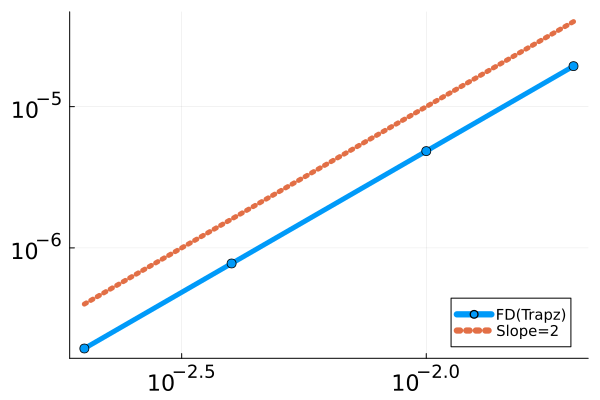

In [39]:
p=Plots.plot();
p=plot!(del_x.*(-1),vec(errf),lw=5,label="FD(Trapz)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
p=plot!(del_x.*(-1),10^(-1)*(del_x.*(-1)).^(2),lw=5,label="Slope=2",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:bottomright)

The following plot shows the order of error of the finite-difference discretization (CDF) using BDF3 for $\beta=2$ at $x=-2$ before interpolation with $M=100$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.02,-0.01,-0.004,-0.002$ are used.

In [40]:
β=2;
xx=-2;
p=Plots.plot();
result_ref3=TW(β;step="bdf3",interp=false,Δx_f=-0.001,M_f=100);
x_ref3=result_ref3[1];F_ref3=result_ref3[2];ind3=findall(x -> x == xx, x_ref3)[1];
del_x=[-0.02,-0.01,-0.004,-0.002];
err3=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf3=TW(β;step="bdf3",interp=false,Δx_f=dx,M_f=100);
    x_cdf3=result_cdf3[1];F_cdf3=result_cdf3[2];
    ind32=findall(x -> x == xx, x_cdf3)[1];
    err3[i]=abs(F_cdf3[ind32]-F_ref3[ind3]);
end

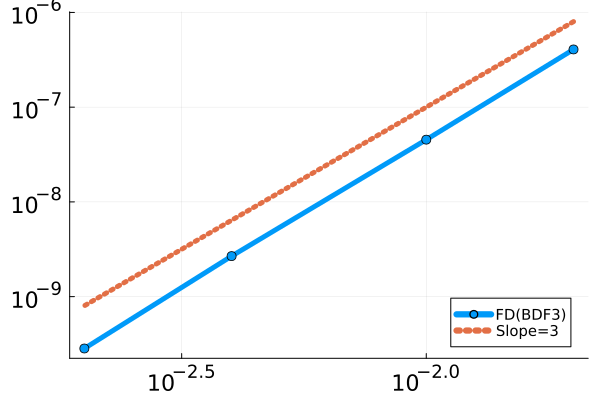

In [41]:
p=Plots.plot();
p=plot!(del_x.*(-1),vec(err3),lw=5,label="FD(BDF3)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
p=plot!(del_x.*(-1),10^(-1)*(del_x.*(-1)).^(3),lw=5,label="Slope=3",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:bottomright)

Combined with the plot before, we have

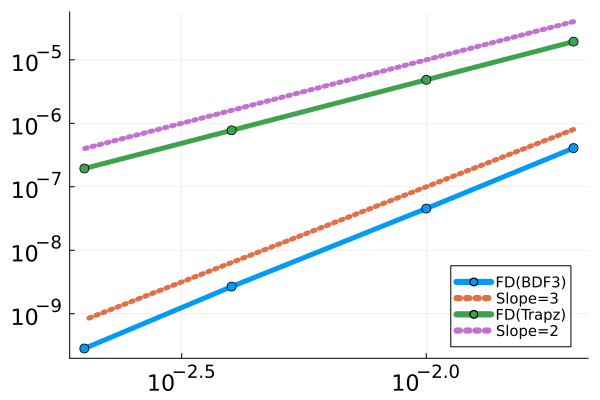

In [42]:
p=plot!(del_x.*(-1),vec(errf),lw=5,label="FD(Trapz)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
p=plot!(del_x.*(-1),10^(-1)*(del_x.*(-1)).^(2),lw=5,label="Slope=2",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:bottomright)

## Error plot with respect to $x_{0}$

The following plot shows the absolute error (CDF) using trapezoidal method after interpolation at $x=-2$ with respect to $x_{0}$. $\beta=1,2,4$, $x_{0}=14,12,10,8,6,4$.

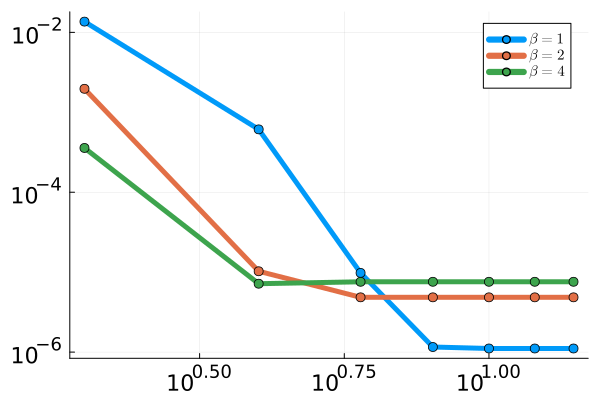

In [45]:
Beta=[1,2,4];
X=[14,12,10,8,6,4,2];
p=Plots.plot();
xx=-2;
for i=1:length(Beta)
    β=Beta[i];
    err=zeros(1,length(X));
    for j=1:length(X)
        x00=X[j];
        F_cdf=TW(β;x0=x00);
        if β==4
            err[j]=abs(F_cdf(xx/(2^(1/6)))-cdf(TW2,xx;beta=β,num_points=300));
        else
            err[j]=abs(F_cdf(xx)-cdf(TW2,xx;beta=β,num_points=300));
        end
    end
    if β==1
        p=plot!(X,vec(err),lw=5,label=L"$\beta=1$",legend=:topright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
    elseif β==2
        p=plot!(X,vec(err),lw=5,label=L"$\beta=2$",legend=:topright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
    elseif β==4
        p=plot!(X,vec(err),lw=5,label=L"$\beta=4$",legend=:topright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=10)
    end
end
p